<a href="https://colab.research.google.com/github/zaknbur/data/blob/master/Seiso-plot%20stuff%20%20Hello%2C_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### Seismo-live vizualisation
**This notebook introduces some basic plotting examples using matplotlib.**
*#we need the following packages, always execute this cell at the beginning*

In [0]:
#plots inside the notebook
%matplotlib inline

#you can use these libraries by refering to their appreviation plt., np. or pd.
#basic plotting library
import matplotlib.pyplot as plt

#scientifc computing library
import numpy as np

#data analysis tool
import pandas as pd 

# Reading in your data

To handle data in python we first have to read it in.
### Simple ascii/txt/csv files.

#### loadtxt by numpy

In [5]:
#read in a seismogram
#4 columns with 
#time North-South East-West Up-Down
time, ns, ew, ud = np.loadtxt('https://raw.githubusercontent.com/zaknbur/data/master/station_1.dat').T
print(time)
print(ns)

[1.490116e-08 2.500002e-02 5.000002e-02 ... 1.599000e+02 1.599250e+02
 1.599500e+02]
[0.00794364 0.00824447 0.00853784 ... 0.00865288 0.00865299 0.00865258]


usefull parameters for loadtxt:

comments : The characters or list of characters used to indicate the start of a comment; default: ‘#’.
skiprows : Skip the first skiprows lines; default: 0.
usecols : Which columns to read, with 0 being the first. For example, usecols = (1,4,5) will extract the 2nd, 5th and 6th columns. The default, None, results in all columns being read.

In [7]:
#in action: we only need the time series and the North-South component
time, ns = np.loadtxt('https://raw.githubusercontent.com/zaknbur/data/master/station_1.dat', usecols=(0,1)).T
print(time)
print(ns)

[1.490116e-08 2.500002e-02 5.000002e-02 ... 1.599000e+02 1.599250e+02
 1.599500e+02]
[0.00794364 0.00824447 0.00853784 ... 0.00865288 0.00865299 0.00865258]


read_csv by pandas¶
much faster than loadtxt, in particular for large files

In [8]:
#read it in without any specifications
data_pd = pd.read_csv('https://raw.githubusercontent.com/zaknbur/data/master/station_1.dat')
print (data_pd)

     # Broadband (3D) simulated ground motion for 1992 Landers EQ
0                                                    #           
1                                        # Station: luc          
2                            #    longitude: -116.61250          
3                               #    latitude: 34.56900          
4             #    closest distance to fault (km): 1.42          
5                                  #    Vs30 (m/s): 685          
6                                                    #           
7                       # Data fields are TAB-separated          
8                                                    #           
9                                  # Column 1: Time (s)          
10    # Column 2: North-south acceleration (cm/s/s) ...          
11    # Column 3: East-west acceleration (cm/s/s) (+...          
12    # Column 4: Up-down acceleration (cm/s/s) (+ i...          
13                                                    #          
14        

It reads in everything!

So we have to set a couple of parameters. Possible parameters that we can set:

sep : string; delimiter to use; default ‘,’
header : integer or list of integers; row number(s) to use as the column names and the start of the data
names : List of column names to use. If file contains no header row, then you should explicitly pass header=None; array-like; default None.
usecols : Return a subset of the columns; array-like or callable; default None.
skiprows : Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file; list-like or integer or callable; default None.
... and many more: full list available at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Let's try this again:

In [9]:
#files uses tab-seperation, so we'll let read_csv know
#names can be used for header names, header can also be read in but now we're skipping them with comment='#'
data_pd = pd.read_csv('https://raw.githubusercontent.com/zaknbur/data/master/station_1.dat', sep = '\t', comment='#', names=['time','NS','EW', 'UD'])
print (data_pd)

              time        NS        EW        UD
0     1.490116e-08  0.007944 -0.000750 -0.015390
1     2.500002e-02  0.008244 -0.000600 -0.015707
2     5.000002e-02  0.008538 -0.000434 -0.016018
3     7.500002e-02  0.008838 -0.000254 -0.016323
4     1.000000e-01  0.009148 -0.000065 -0.016622
5     1.250000e-01  0.009453  0.000126 -0.016913
6     1.500000e-01  0.009751  0.000322 -0.017196
7     1.750000e-01  0.010055  0.000538 -0.017472
8     2.000000e-01  0.010368  0.000773 -0.017739
9     2.250000e-01  0.010681  0.001019 -0.017999
10    2.500000e-01  0.010990  0.001263 -0.018251
11    2.750000e-01  0.011309  0.001509 -0.018495
12    3.000000e-01  0.011637  0.001766 -0.018731
13    3.250000e-01  0.011960  0.002034 -0.018959
14    3.500000e-01  0.012278  0.002313 -0.019179
15    3.750000e-01  0.012606  0.002603 -0.019391
16    4.000000e-01  0.012944  0.002897 -0.019593
17    4.250000e-01  0.013281  0.003189 -0.019787
18    4.500000e-01  0.013623  0.003475 -0.019971
19    4.750000e-01  

Now we can nicely refer to our data with:

In [10]:
print('time')
print (data_pd['time'])

time
0       1.490116e-08
1       2.500002e-02
2       5.000002e-02
3       7.500002e-02
4       1.000000e-01
5       1.250000e-01
6       1.500000e-01
7       1.750000e-01
8       2.000000e-01
9       2.250000e-01
10      2.500000e-01
11      2.750000e-01
12      3.000000e-01
13      3.250000e-01
14      3.500000e-01
15      3.750000e-01
16      4.000000e-01
17      4.250000e-01
18      4.500000e-01
19      4.750000e-01
20      5.000000e-01
21      5.250000e-01
22      5.500000e-01
23      5.750000e-01
24      6.000000e-01
25      6.250000e-01
26      6.500000e-01
27      6.750000e-01
28      7.000000e-01
29      7.250000e-01
            ...     
6369    1.592250e+02
6370    1.592500e+02
6371    1.592750e+02
6372    1.593000e+02
6373    1.593250e+02
6374    1.593500e+02
6375    1.593750e+02
6376    1.594000e+02
6377    1.594250e+02
6378    1.594500e+02
6379    1.594750e+02
6380    1.595000e+02
6381    1.595250e+02
6382    1.595500e+02
6383    1.595750e+02
6384    1.596000e+02
6385    

**Other data formats**

There are other possibilties to read in your data when it's not in ascii format.

For example, we will later use netcdf-based data formats in the second tutorial.

More packages for handling data input:

netcdf4 package (Network Common Data Form)
read in hdf with panda (Hierarchical Data Format)
What kind of data format are you using?

Plotting your data - Simple Plots
Matplotlib is a widely used plotting library that we will use here for our first simple plots.

Single Figures
Axis labels, titles
Subplots
Styles
Scatter plots
Other types of plots
How to save your plots

###Single figures

Call the plotting function together with its package that we called 'plt'.


The plot gets visible by inserting plt.show() at the end.

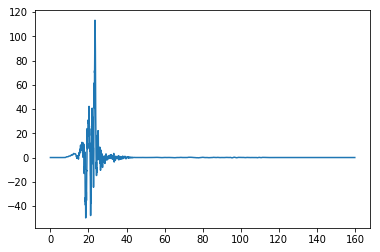

In [11]:
plt.plot(data_pd['time'], data_pd['NS'])
plt.show()

# 2. Labels and titles

Let's insert more information!

label the axis
insert a legend
give a title

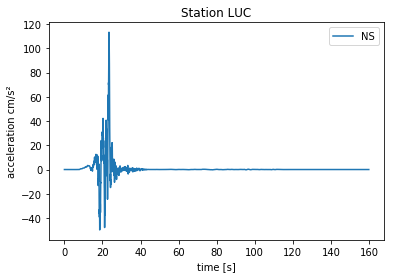

In [12]:
#default label is the name of the array, but you can also label it with a own name

plt.plot(data_pd['time'], data_pd['NS'])
#plt.plot(data_pd['time'],data_pd['NS'], label='North-South')

plt.legend()

#axis labels
plt.xlabel('time [s]')
plt.ylabel('acceleration cm/s²')

#title
plt.title('Station LUC')

plt.show()

# 3. Subplots
We now want to plot all three components of the seismogram in one single plot.

Subplots are structured as follows: 

We will now introduce three axis in one figure.

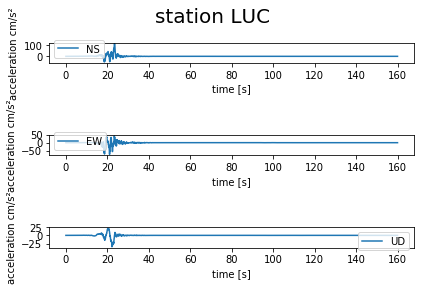

In [13]:
#create a figure f and three subplots
f, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.plot(data_pd['time'], data_pd['NS'])
#for axis properties we use set_*
ax1.set_xlabel('time [s]')
ax1.set_ylabel('acceleration cm/s²')
ax1.legend()

ax2.plot(data_pd['time'], data_pd['EW'])
ax2.set_xlabel('time [s]')
ax2.set_ylabel('acceleration cm/s²')
ax2.legend()

ax3.plot(data_pd['time'], data_pd['UD'])
ax3.set_xlabel('time [s]')
ax3.set_ylabel('acceleration cm/s²')
ax3.legend()


#plot title over all subplots
f.suptitle('station LUC', size=20)

#needs to be shifted when tight_layout is used
f.subplots_adjust(top=0.5)
#makes all axis labels visible
f.tight_layout()

f.show()

Beautify the plot!

plots can share axis, plots can even share boxes
focus on the area of interest

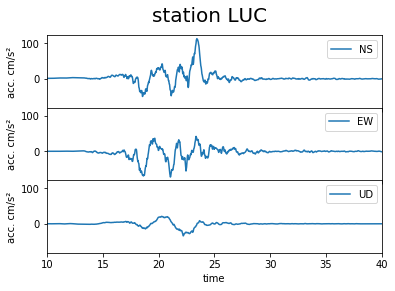

In [14]:
#share x axis
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)

ax1.plot(data_pd['time'], data_pd['NS'])
ax1.set_ylabel('acc. cm/s²')
ax1.legend()

ax2.plot(data_pd['time'], data_pd['EW'])
ax2.set_ylabel('acc. cm/s²')
ax2.legend()

ax3.plot(data_pd['time'], data_pd['UD'])
ax3.set_ylabel('acc. cm/s²')
ax3.set_xlabel('time')
ax3.legend()

#share the box
plt.subplots_adjust(hspace=0)

#reduce number of ticks
plt.locator_params(axis='both', numtick=8)

#focus on the time where the signal is
plt.xlim((10.0,40.0))

#plot title over all subplots
f.suptitle('station LUC', size=20)


plt.show()

# 4. Styles
You can use different style option to render your plot.

Full documentation available here: https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html

In [15]:
print(plt.style.available)

['grayscale', 'seaborn-darkgrid', 'tableau-colorblind10', 'seaborn-talk', 'seaborn-dark-palette', 'dark_background', 'classic', 'bmh', 'fast', 'seaborn-white', 'seaborn-paper', 'seaborn-muted', 'seaborn-deep', 'seaborn-pastel', 'seaborn-bright', 'seaborn-colorblind', 'ggplot', 'seaborn-poster', 'fivethirtyeight', 'seaborn', 'seaborn-dark', 'seaborn-whitegrid', 'Solarize_Light2', '_classic_test', 'seaborn-notebook', 'seaborn-ticks']


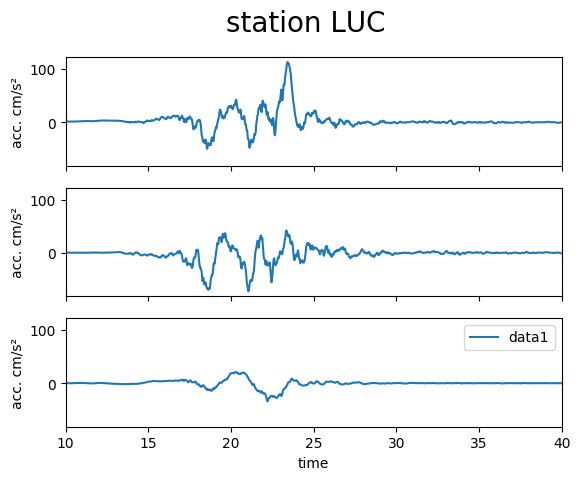

In [16]:
# choose a style from above
plt.style.use('default')

#you can also combine different styles
#plt.style.use(('fivethirtyeight', 'seaborn-white', 'seaborn-pastel'))

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)

ax1.plot(data_pd['time'],data_pd['NS'])
ax1.set_ylabel('acc. cm/s²')

ax2.plot(data_pd['time'],data_pd['EW'])
ax2.set_ylabel('acc. cm/s²')

ax3.plot(data_pd['time'],data_pd['UD'], label='data1')
ax3.set_ylabel('acc. cm/s²')
ax3.set_xlabel('time')
ax3.legend()


#reduce number of ticks
plt.locator_params(axis='both',numtick=8)

#focus on the time where the signal is
plt.xlim((10.0,40.0))

#plot title over all subplots
f.suptitle('station LUC', size=20)


plt.show()

or you can change the line style and colors.

In [17]:
#read in another dataset
data2_pd = pd.read_csv('data/station_2.dat', sep = '\t', comment='#', names=['time','NS','EW', 'UD'])

FileNotFoundError: ignored

NameError: ignored

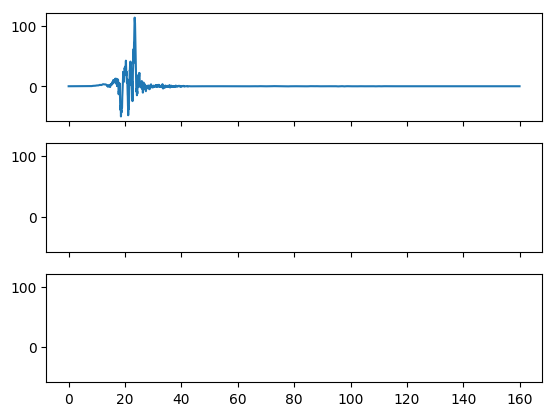

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True)

ax1.plot(data_pd['time'], data_pd['NS'])
ax1.plot(data2_pd['time'], data2_pd['NS'], ls='-.')
ax1.set_ylabel('acc. cm/s²')

ax2.plot(data_pd['time'], data_pd['EW'])
ax2.plot(data2_pd['time'], data2_pd['EW'], ls='--')
ax2.set_ylabel('acc. cm/s²')

ax3.plot(data_pd['time'], data_pd['UD'], label='station 1')
ax3.plot(data2_pd['time'], data2_pd['UD'], ls=':', label='station 2')
ax3.set_ylabel('acc. cm/s²')
ax3.set_xlabel('time')
ax3.legend()


#reduce number of ticks
plt.locator_params(axis='both',numtick=8)

#focus on the time where the signal is
plt.xlim((10.0,40.0))

#plot title over all subplots
f.suptitle('Landers earthquake', size=20)


plt.show()

# 5. Scatter Plots
Using scatter plots we can show discrete data, for example measurements in dependence of two (or even three) dimensions.

Full documentation: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html

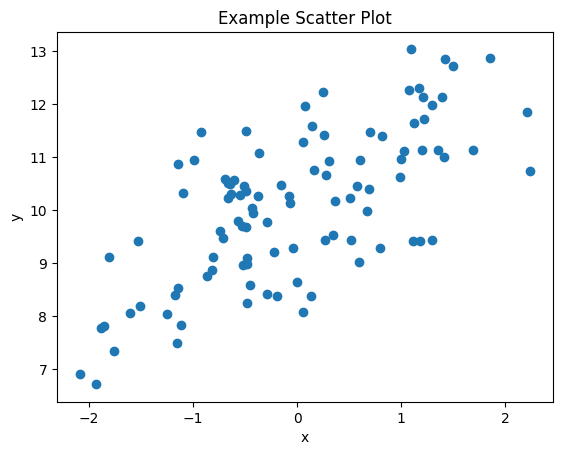

In [19]:
# For this example we first create some random input.
# You can use your own dataset by reading in your data first
x = np.random.randn(100)
y = x + np.random.randn(100) + 10

#-------
# Insert linear fit

#from scipy import stats
#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#line = slope*x+intercept
#we can add some oppacity with alpha (0 to 1)
#plt.plot(x, line, alpha=0.5)

#-------
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example Scatter Plot')

plt.scatter(x,y)


plt.show()

Additionally, we can use color and size as a third dimension of information in our scatter plot.

Available colorbars: https://matplotlib.org/users/colormaps.html

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


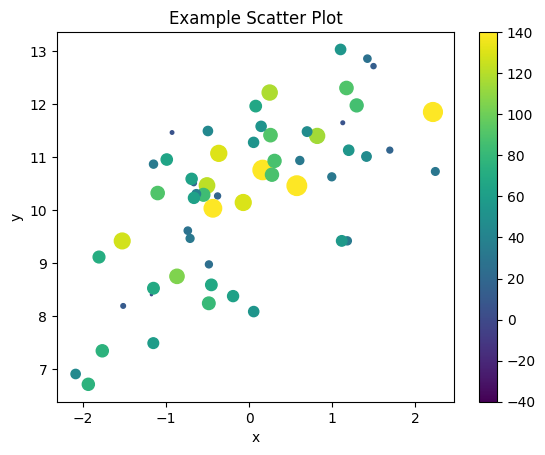

In [20]:
#create a third dimension, for example temperature
z = np.random.randn(100)*70

#plt.scatter(x,y, cmap='viridis', c=z)

#even better to spot the difference: 
#change the size according to the third data dimension
#colorbar can be restricted by vmin and vmax
plt.scatter(x, y, cmap='viridis', c=z, s=z, vmin=-40, vmax=140)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Example Scatter Plot')

plt.colorbar()

#set colorbar axis to customized range
#plt.set_cmap([0,150])

plt.show()

# Additional options on markers and labels

You can customize your scatter plot by adding different markers for different datasets and labels.

Markerstyles can be found here: https://matplotlib.org/api/markers_api.html

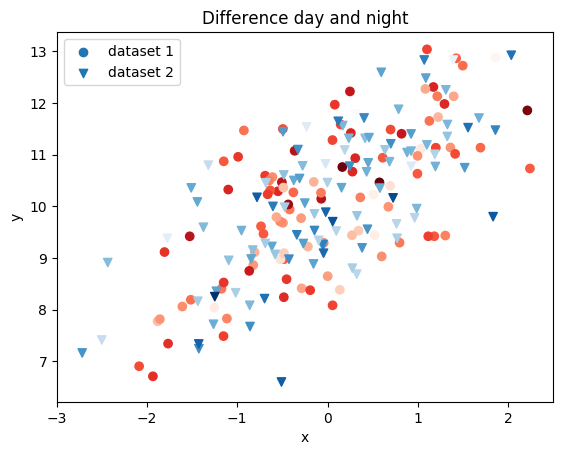

In [21]:
#create a second data set
x_2 = np.random.randn(100)
y_2 = x_2 + np.random.randn(100) + 10
z_2 = np.random.randn(100)*70

#shades of red with z=color itensity
plt.scatter(x, y, cmap='Reds', c=z, label='dataset 1')

#shades of blue with z=color intensity
plt.scatter(x_2, y_2, cmap='Blues', c=z_2, marker ='v', label='dataset 2')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.title('Difference day and night')
plt.show()

# 3D scatter plots

You can also use a 3D figure to plot your three dimensional data set.

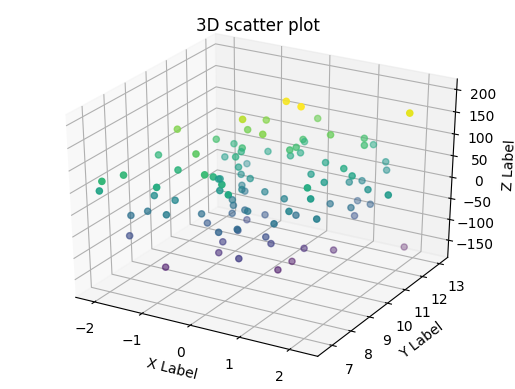

In [22]:
# we need the following package
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colored by the z values
ax.scatter(x, y, z, c=z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('3D scatter plot')
plt.show()

# 6. Other types of plots

Some additional graphics and inspiration.

Bar plots

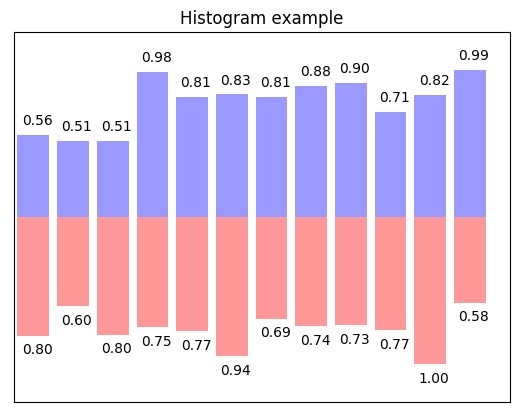

In [23]:
#Generates
n = 12
#creates a array ranging from 0 to 11
X = np.arange(n)

#n random number, uniform distribution
Y1 = np.random.uniform(0.5, 1.0, n)
Y2 = np.random.uniform(0.5, 1.0, n)

#set a face and edge color
plt.bar(X, +Y1, facecolor='#9999ff')
plt.bar(X, -Y2, facecolor='#ff9999')

for x,y in zip(X,Y1):
    #annotations
    #shift the values slightly above the bars
    plt.text(x+0.1, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,Y2):
    plt.text(x+0.1, -y-0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-.5, n)
#remove ticks on x axis
plt.xticks([])

plt.ylim(-1.25, +1.25)
#or fully remove the ticks/labels
plt.yticks([])

plt.title('Histogram example')

plt.show()

# Seaborn

Seaborn is a package dedicated to statistical graphics.

More general information: http://seaborn.pydata.org/examples/

Jointplots combine scatter plots with distribution plots along the two axis.

More information about jointplots: https://seaborn.pydata.org/generated/seaborn.jointplot.html

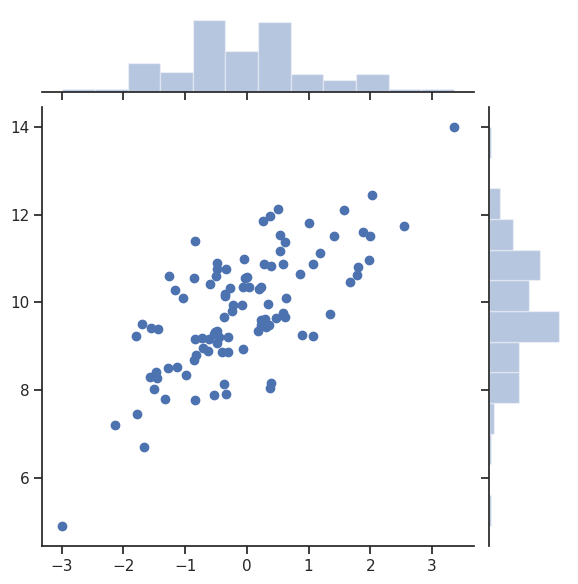

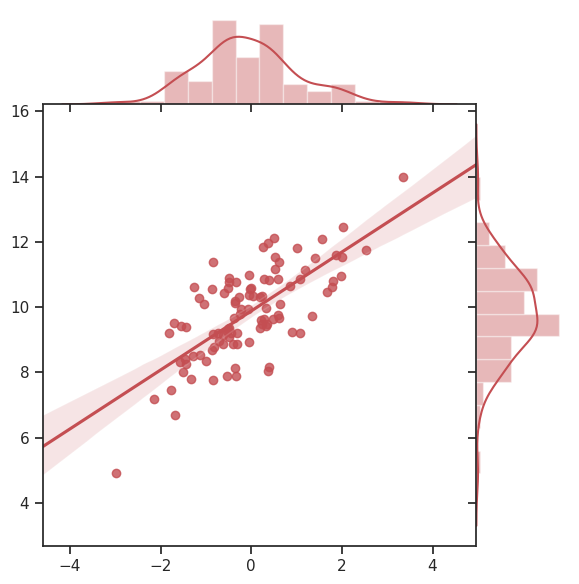

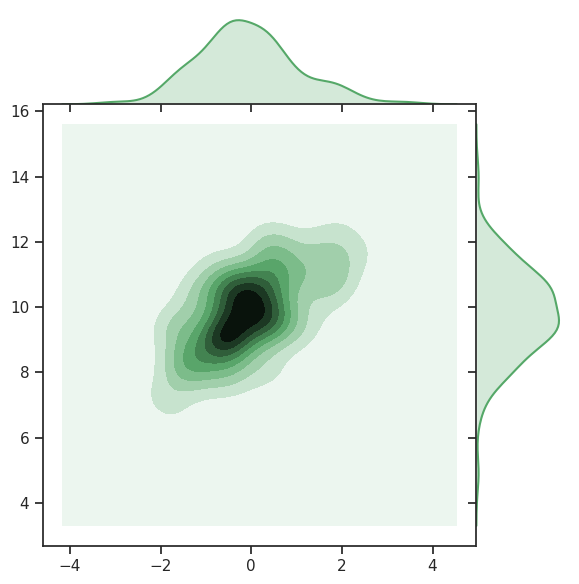

In [26]:
#same random data set as before for the scatter plot
#this time with seaborn
import seaborn as sns

x_2 = np.random.randn(100)
y_2 = x_2 + np.random.randn(100) + 10

#data needs to put into this format
data = pd.DataFrame({"x": x_2, "y": y_2})

#scatter plot with distribution along x and y coordinate
#first plot: default
sns.jointplot(x=x_2, y=y_2, data=data)

#but you can also play around with the "kind" option
#second plot: hex + changed color
sns.jointplot(x=x_2, y=y_2, data=data, kind="reg", space=0, color="r")

#third plot: kde + changed color
sns.jointplot(x=x_2, y=y_2, data=data, kind="kde", space=0, color="g")

plt.show()

**Some more inspiration**

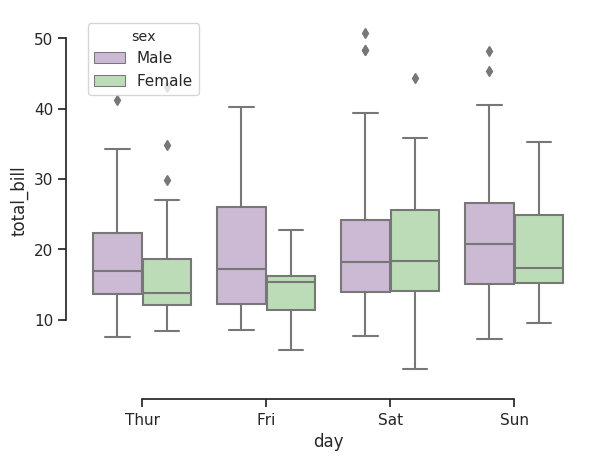

In [25]:
#Error bar plots

sns.set(style="ticks")

#Load the example tips dataset
tips = sns.load_dataset("tips")

#Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")

#This setting removes the borders to minimalize the figure
sns.despine(offset=10, trim=True)

plt.show()

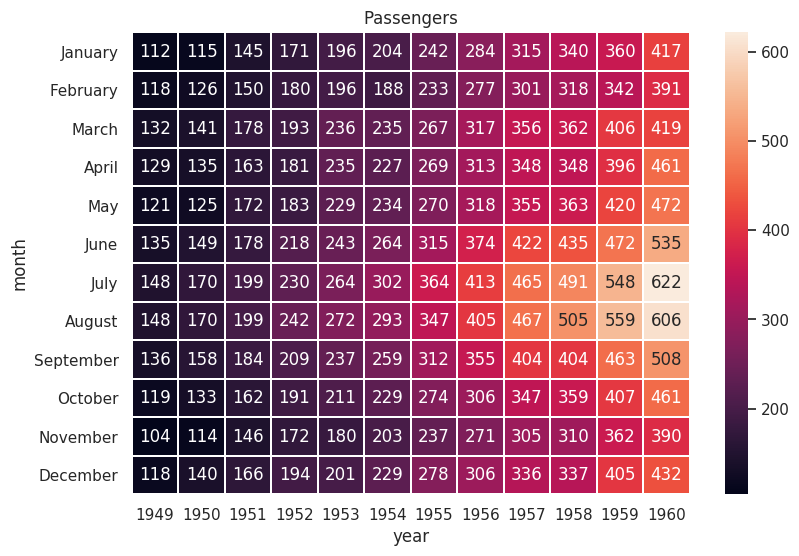

In [27]:
# Heatmaps
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))

#main command
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title('Passengers')

plt.show()

# 7. How to save your plots

You can easily save your nice figures by using

plt.savefig('my_figure.png')
before calling

plt.show()
The resolution can be increase by increasing dpi values or saving in pdf or svg format.

plt.savefig('my_figure.png', dpi=800)
plt.savefig('my_figure.svg')

# Back to the stuff from Colaboratory

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

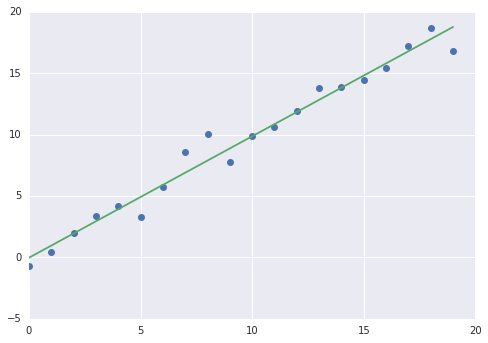

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

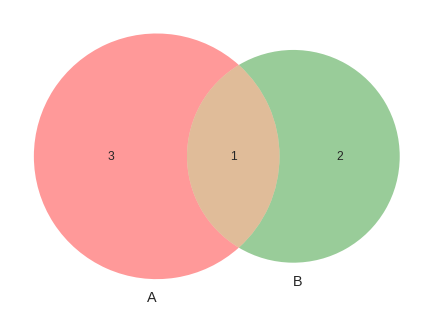

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = -0.2 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).

In [0]:
import pandas as pd

In [0]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("norway_mag.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Latitude,Longitude,Mag-Field
0,64.665813,13.149861,51990.5
1,64.666035,13.149779,51999.6
2,64.666260,13.149758,51990.9
3,64.666465,13.149815,51988.1
4,64.666723,13.149768,52004.7


In [0]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("russian-mn-maroc.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Eastings,Northings,Mn-thickness
0,2065,7725,0.1
1,2165,7725,0.0
2,2265,7725,0.8
3,2265,7775,0.4
4,2265,7825,0.0


In [0]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("zim-gold-grab.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Eastings,Northings,Au-gpt
0,12065,7725,0.1
1,12065,7775,0.0
2,12065,7825,0.8
3,12065,7875,0.4
4,12065,7925,0.0


/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


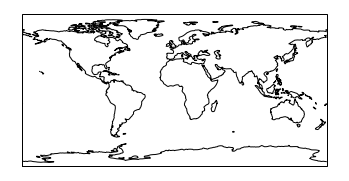

In [0]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('coastlines.pdf')
plt.savefig('coastlines.png')

plt.show()

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 130942 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

In [0]:
sorted(mpl.style.available)
['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'mycustomstyle',
 'seaborn',
 ...
 'seaborn-whitegrid']

SyntaxError: ignored

In [0]:
def doplot():
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        ax.plot(x, np.sin(x + i * .5) * (7 - i))
    return ax

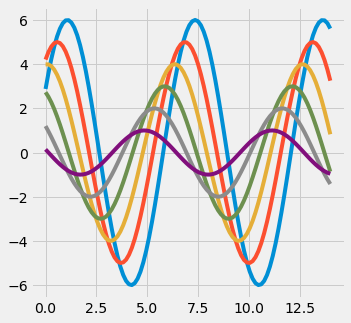

In [0]:
mpl.style.use('fivethirtyeight')
doplot()

Text(0.5, 1.0, 'default style')

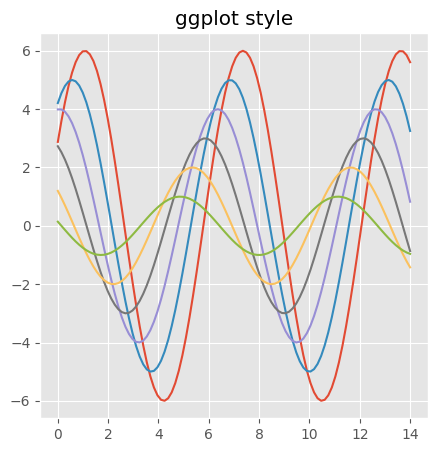

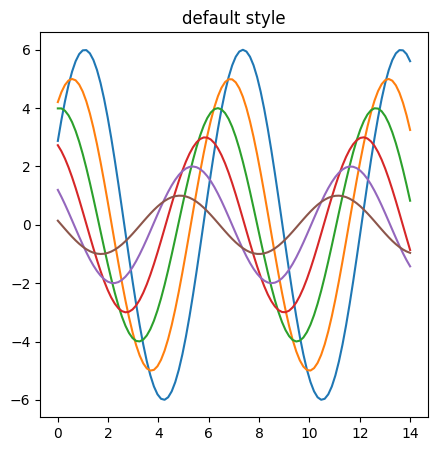

In [0]:
# Set the default style.
mpl.style.use('default')
# Temporarily switch to the ggplot style.
with mpl.style.context('ggplot'):
    ax = doplot()
    ax.set_title('ggplot style')
# Back to the default style.
ax = doplot()
ax.set_title('default style')